# 2022-06-08_PKU_TCAconversion

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D
from scipy.stats import linregress

## Data Import

In [3]:
# Renaming the file as "file"
file = '/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Data_fromSynlogic/6-18-2022  TCA Production by Shake Flask biomass of SYN8784 - Alex_OverTime.xlsx'
sheets = ['tidy']

# Getting data as dataframe
xl = pd.read_excel(file, sheet_name = sheets, header = 0, fill_value = 0)


In [4]:
xl['tidy']

,strain_num,inducer,inducer_conc,replicate,time,tca_conc
0,SYNB1618,iptg,1000,1,0,0.068170
1,SYNB1618,iptg,1000,1,30,0.420828
2,SYNB1618,iptg,1000,1,60,1.052760
3,SYNB1618,iptg,1000,1,90,1.447386
4,SYNB1618,iptg,1000,1,120,1.963114
5,SYNB1618,iptg,1000,1,0,0.053375
6,SYNB1618,iptg,1000,1,30,0.419396
7,SYNB1618,iptg,1000,1,60,0.976400
8,SYNB1618,iptg,1000,1,90,1.380571
9,SYNB1618,iptg,1000,1,120,1.781759


In [5]:
data= xl['tidy']


strains = sorted(data['strain_num'].unique())
inducers = sorted(data['inducer'].unique())
iptg_conc = sorted(data['inducer_conc'].unique())
replicate = sorted(data['replicate'].unique())
time = sorted(data['time'].unique())

print(strains, inducers, iptg_conc, replicate, time)


['SYN7664', 'SYN7696', 'SYN8784', 'SYNB1618'] ['iptg'] [0, 1000] [1, 2, 3] [0, 30, 60, 90, 120]


In [6]:
inducer_info = {'iptg': {'conc': iptg_conc}}#,
#                'ohc14': {'conc': ohc14}}

# promoters = ['P$_\mathrm{Tac}$','P$_\mathrm{Cin}$', 'P$_\mathrm{PhlF}$',
#              'P$_\mathrm{LitR}$','P$_\mathrm{PsrA}$']

# fig_pos = {'AJT462': {'fig_row': 0,'fig_col':0},
#            'AJT463': {'fig_row': 0,'fig_col':1}}

strains_iptg_conc = {
    'SYNB1618': 1000,
    'SYN7664': 1000,
    'SYN7696': 1000,
    'SYN8784': 0
}

# strain_info = {
#     'SYNB1618': {
#         'inducer_conc': ,
#         'marker_color': ,
#         'line_color': 
#     },
#     'SYN7664': ,
#     'SYN7696': ,
#     'SYN8784': 
# }

rep_info = {'1': {'marker': 'o',
                   'facecolor': 'white',
                   'edgecolor': 'black',
                   'linecolor': 'black'},
            '2': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'grey',
                   'linecolor': 'grey'},
            '3': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'darkgrey',
                    'linecolor': 'darkgrey'}}


In [7]:
# # data.loc[data
# #          [
# #              (data['strain_num']=='AJT462') &
# #              (data['inducer']=='iptg') &
# #              (data['inducer_conc']==1000) &
# #              (data['replicate']==1)
# #              ], 'tca_conc'
# #         ]

# data[(data['strain_num']=='AJT462') &
#      (data['inducer']=='iptg') &
#      (data['inducer_conc']==1000) &
#      (data['replicate']==1)
#      ].loc[:,'tca_conc']


# # TCA_data_TF_r1['AJT462']['M9']['iptg'][1000].loc[:,'TCA (mM)']

105    0.117404
106    0.681852
107    1.263819
108    1.927950
109    2.062620
Name: tca_conc, dtype: float64

In [18]:
# grouped by replicates first since there were technical replicates as well
grouped_df_reps = data.groupby(['strain_num','inducer','inducer_conc', 'time', 'replicate'], as_index=False).agg([np.mean])

# second grouping was done as previously. I believe the two sets of groupings impact standard deviation (haven't verified this)
# so wanted to keep as consistent as before
grouped_df = grouped_df_reps['tca_conc'].groupby(['strain_num','inducer','inducer_conc', 'time'], as_index=False).agg([np.mean, np.std])

grouped_df = grouped_df['mean']
grouped_df = grouped_df.reset_index()

# grouped_df_reps['tca_conc']
grouped_df

,strain_num,inducer,inducer_conc,time,mean,std
0,SYN7664,iptg,1000,0,0.060620,0.009932
1,SYN7664,iptg,1000,30,0.887329,0.038828
2,SYN7664,iptg,1000,60,1.814800,0.108518
3,SYN7664,iptg,1000,90,3.133346,0.115422
4,SYN7664,iptg,1000,120,4.151907,0.172550
5,SYN7696,iptg,1000,0,0.005449,0.005159
6,SYN7696,iptg,1000,30,0.473820,0.014293
7,SYN7696,iptg,1000,60,1.563585,0.068583
8,SYN7696,iptg,1000,90,2.503349,0.083667
9,SYN7696,iptg,1000,120,3.505048,0.156973


In [29]:
grouped_df_reps['tca_conc']['mean'].reset_index()

,strain_num,inducer,inducer_conc,time,replicate,mean
0,SYN7664,iptg,1000,0,1,0.071829
1,SYN7664,iptg,1000,0,2,0.057115
2,SYN7664,iptg,1000,0,3,0.052915
3,SYN7664,iptg,1000,30,1,0.930690
4,SYN7664,iptg,1000,30,2,0.855774
5,SYN7664,iptg,1000,30,3,0.875524
6,SYN7664,iptg,1000,60,1,1.879993
7,SYN7664,iptg,1000,60,2,1.689529
8,SYN7664,iptg,1000,60,3,1.874878
9,SYN7664,iptg,1000,90,1,3.071626


In [19]:
grouped_df[grouped_df['inducer_conc']==0]

,strain_num,inducer,inducer_conc,time,mean,std
10,SYN8784,iptg,0,0,-0.005555,0.004183
11,SYN8784,iptg,0,30,0.378829,0.027208
12,SYN8784,iptg,0,60,1.277471,0.056411
13,SYN8784,iptg,0,90,2.143558,0.108352
14,SYN8784,iptg,0,120,3.137647,0.135299


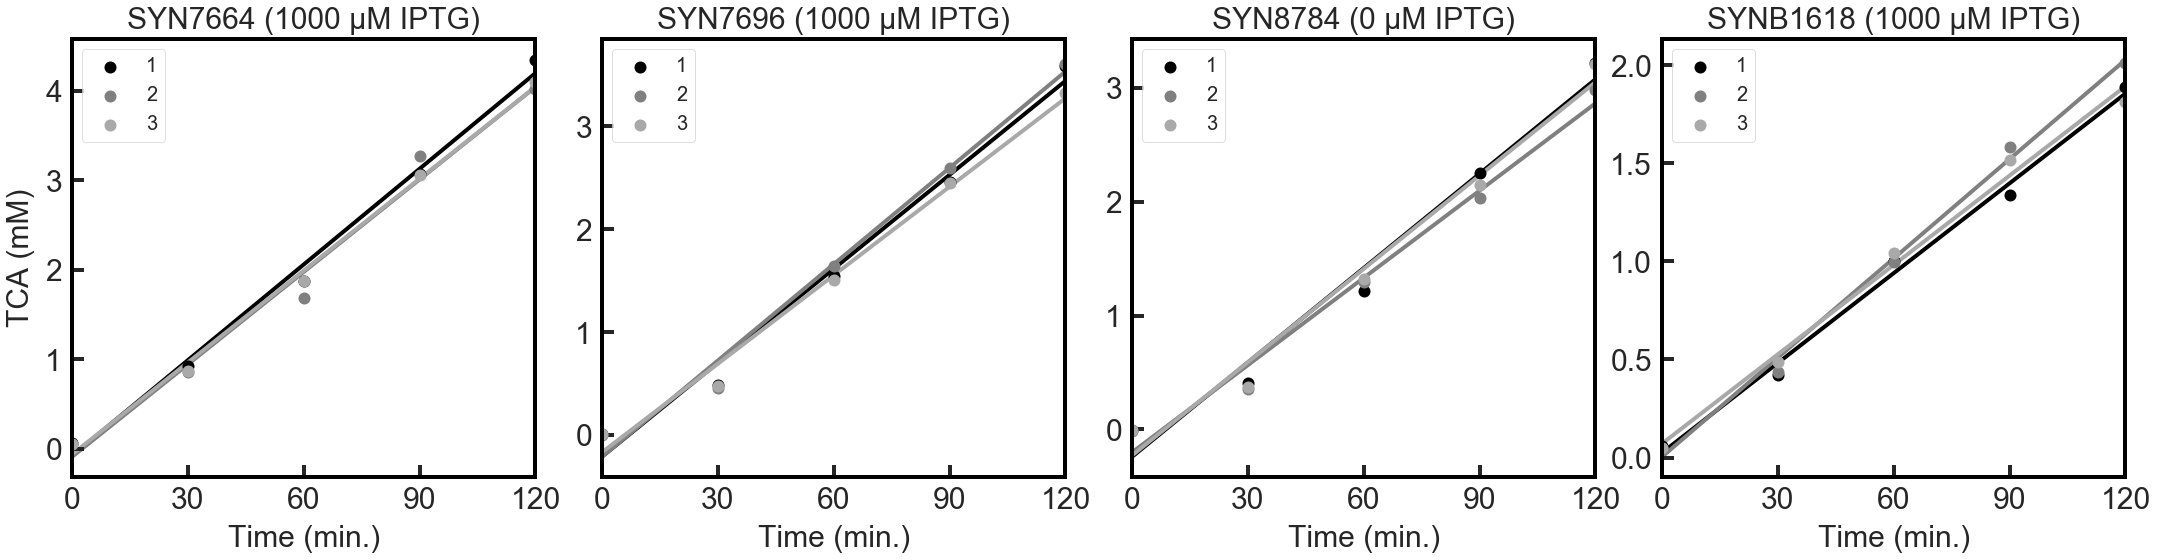

In [31]:
rows = 1
cols = 4

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    results[s][strains_iptg_conc[s]] = dict()
    for r in replicate:

        # set figure position within subplot
        FP = ax[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(4)

        plot_data = grouped_df_reps['tca_conc']['mean'].reset_index()
        
        x = plot_data[(plot_data['strain_num']== s) &
            (plot_data['inducer_conc']== strains_iptg_conc[s]) &
            (plot_data['replicate']== r)
            ].loc[:,'time']


        y = plot_data[(plot_data['strain_num']== s) &
            (plot_data['inducer_conc']== strains_iptg_conc[s]) &
            (plot_data['replicate']== r)
            ].loc[:,'mean']


        r = r.astype(str)

        # calculate slope of best-fit line through the points
        results[s][strains_iptg_conc[s]][r] = linregress(x, y)

        # plot data
        FP.scatter(x, y, color = rep_info[r]['edgecolor'], zorder = 1,
           edgecolors = rep_info[r]['edgecolor'], linewidths = 2, marker = rep_info[r]['marker'], s = 100,
                  label = '{}'.format(r))

        # plot best-fit line
        y_fit = results[s][strains_iptg_conc[s]][r].intercept + results[s][strains_iptg_conc[s]][r].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
        FP.plot(x, y_fit, color = rep_info[r]['linecolor'], zorder=0,
                linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
        FP.set_title('{} ({} \u03BCM IPTG)'.format(s,strains_iptg_conc[s]), size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)


#             if s == 'AJT462':
#                 FP.set_ylim(-0.1,0.4)
#             if s == 'AJT463':
#                 FP.set_ylim(-0.1,1)

        FP.set_xlim(0,120)

        if strains.index(s) == 0:
            FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

        FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
        FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [10]:
# fig.savefig('AJT462_463_TCAconversion_Time_x_TCA_EachReplicate.pdf', bbox_inches = "tight", transparent = True)

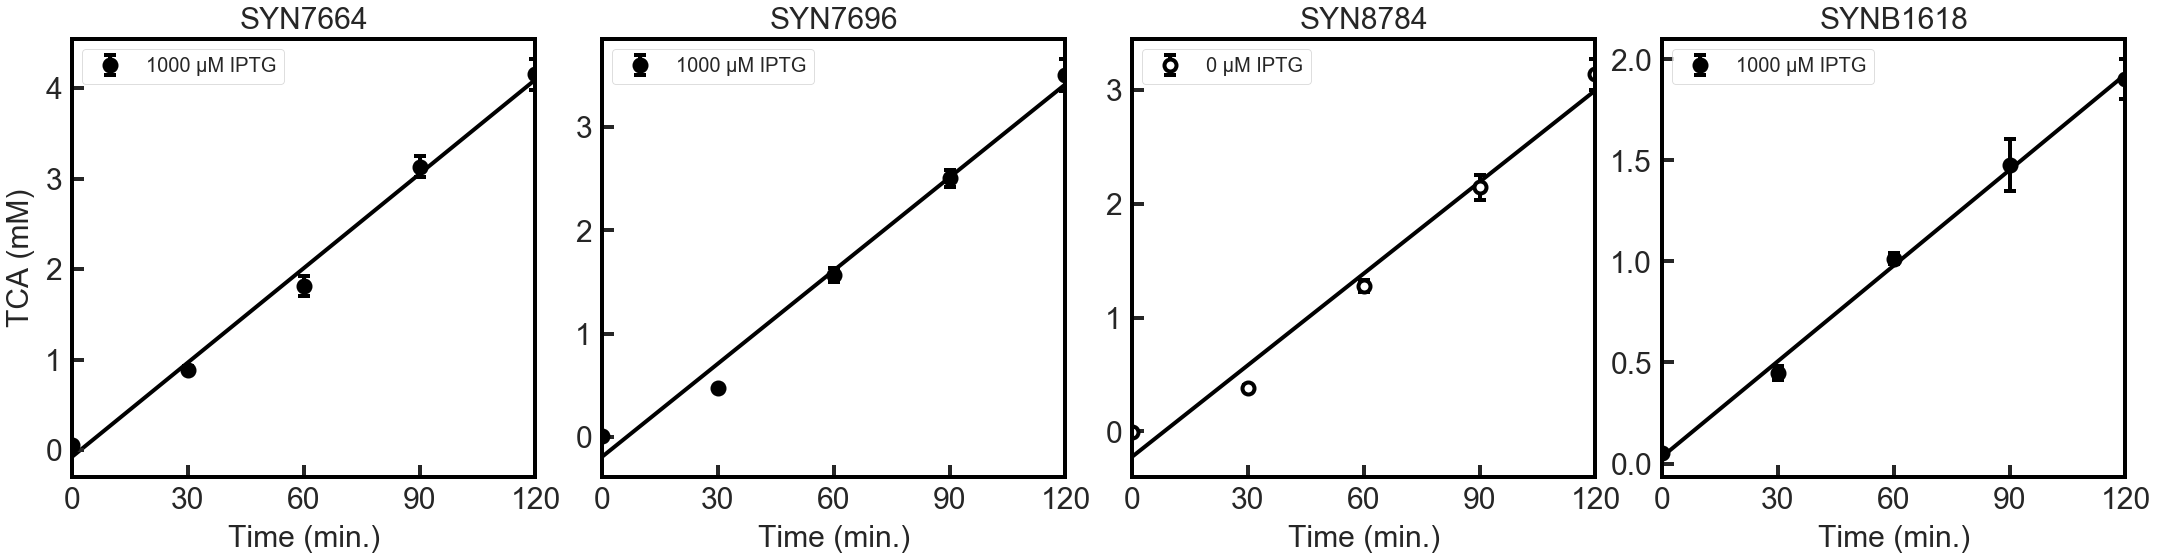

In [34]:
grays = ['#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']

rows = 1
cols = 4

fig_means, ax_means = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    c = strains_iptg_conc[s]
    results[s][c] = dict()
    
    # set figure position within subplot
    FP = ax_means[strains.index(s)]

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(4)

    x_means = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'time']


    y_means = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'mean']

    y_std = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'std']


    # calculate slope of best-fit line through the points
    results[s][c] = linregress(x_means, y_means)

    # plot data
    if c == 0:
        FP.errorbar(x_means, y_means, yerr = y_std,
                    mfc = 'white', zorder = 1, mec = 'black', 
                    mew = 4, marker = 'o', ms = 12, linewidth = 0,
                    ecolor = 'black', elinewidth = 4, capsize = 6, capthick = 4,
                    label = '{} \u03BCM IPTG'.format(c))
        
    elif c == 1000:
        FP.errorbar(x_means, y_means, yerr = y_std,
                    mfc = 'black', zorder = 1, mec = 'black', 
                    mew = 4, marker = 'o', ms = 12, linewidth = 0,
                    ecolor = 'black', elinewidth = 4, capsize = 6, capthick = 4,
                    label = '{} \u03BCM IPTG'.format(c))
        

    # plot best-fit line
    y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    FP.plot(time, y_fit, color = 'black', zorder=0,
            linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


    FP.grid(False)
    FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
    FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

#         if s == 'AJT437':
#                 FP.set_ylim(-0.1,3)
#         if s == 'AJT462':
#             FP.set_ylim(-0.1,0.4)
#         if s == 'AJT463':
#             FP.set_ylim(-0.1,1)

    FP.set_xlim(0,120)

    if strains.index(s) == 0:
        FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

    FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
    FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

    FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [12]:
# fig_means.savefig('AJT462_463_TCAconversion_Time_x_TCA_ErrorBars.pdf', bbox_inches = "tight", transparent = True)

In [13]:
## Function to adjust figure size to make actual axes certain size
# from https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [35]:
from sklearn.linear_model import LinearRegression

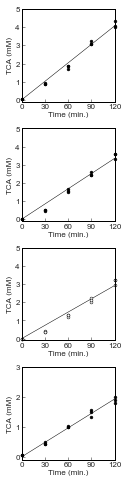

In [48]:
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# rows = 3
# cols = 1

# fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.5*rows), sharey = 'row', constrained_layout = True)
# # plt.tight_layout(h_pad = 0) #tidies up spacing between plots

# results = dict()

# for s in strains:
#     results[s] = dict()
#     for c in iptg_conc:

#         # set figure position within subplot
#         FP = ax_means2[strains.index(s)]
# #         FP.set_aspect('equal', adjustable = 'box') 

#         # make plot borders black and specified thickness
#         for spine in FP.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(1)

#         # calculate slope of best-fit line through the points
#         results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

#         if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = 'black', zorder=0,
#                 linewidth = 0.5)
            
        
#         # plot data
#         if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

#             # plot best-fit line
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                     linewidth = 0.5)

# #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
# #            marker = 'o', ms = 10, linewidth = 4,
# #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


#         FP.grid(False)
# #         FP.set_title(s, size = 30, pad = 10)
# #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
#         FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
#         FP.set_xlim(0,120)

# #         if strains.index(s) == 0:
#         FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
# #         FP.yaxis.set_major_locator(MultipleLocator(0.5))
# #         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# #         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#         FP.legend(markerscale = 1, fontsize = 7, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon = False)
        
# #         set_size(2,2)
# # plt.show()

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 4
cols = 1

fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols*2/3,1.65*rows), sharey = 'row', constrained_layout = True)
# plt.tight_layout(h_pad = 0) #tidies up spacing between plots

results = dict()
# model= dict()

for s in strains:
    results[s] = dict()
#     model[s] = dict()
    c = strains_iptg_conc[s]

    # set figure position within subplot
    FP = ax_means2[strains.index(s)]
#         FP.set_aspect('equal', adjustable = 'box') 

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


    x_means = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'time']


    y_means = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'mean']

    y_std = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'std']

    # calculate slope of best-fit line through the points
    # if statements because Chris wanted to fix fits to (0,0) and wanted to exclude rightmost points for full induction

    results[s][c] = LinearRegression(fit_intercept=False)
#         model[s][c].fit(new_x[:, np.newaxis], new_y)

#         xfit = np.linspace(0, 10, 1000)
#         yfit = model.predict(xfit[:, np.newaxis])

    if s=='AJT462' and c==1000:
        new_x = x_means[:-1]
        new_y = pd.Series([0]).append(y_means[1:-1])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

    elif s=='AJT463' and c==0:
        new_x = x_means[:-1]
        new_y = pd.Series([0]).append(y_means[1:-1])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
        #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

    else:
        new_x = x_means
        new_y = pd.Series([0]).append(y_means[1:])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means, pd.Series([0]).append(y_means[1:]))

#         results[s][c] = linregress(x_means, y_means)

## COMMENTED OUT BELOW

    for r in replicate:

        plot_data = grouped_df_reps['tca_conc']['mean'].reset_index()
        
        x = plot_data[(plot_data['strain_num']== s) &
            (plot_data['inducer_conc']== c) &
            (plot_data['replicate']== r)
            ].loc[:,'time']


        y = plot_data[(plot_data['strain_num']== s) &
            (plot_data['inducer_conc']== c) &
            (plot_data['replicate']== r)
            ].loc[:,'mean']


#         # plot data
#         FP.errorbar(x_means, y_means, yerr = y_std,
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
#                     mew = 4, marker = 'o', ms = 12, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
#                     label = '{} \u03BCM IPTG'.format(c))

#         # plot best-fit line
#         y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#         FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                 linewidth = 4)



        if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

            FP.scatter(x, y, 
                    color = 'white', zorder = 1, edgecolors = 'black', linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c), clip_on=False)


            if r == 3:

                y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value

                FP.plot(time, y_fit, color = 'black', zorder=0,
                    linewidth = 0.5)


        # plot data
        if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

            FP.scatter(x, y, 
                    color = 'black', zorder = 1, 
                    edgecolors = 'black', linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c), clip_on=False)


            if r == 3:
                # plot best-fit line
                y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value

                FP.plot(time, y_fit, color = 'black', zorder=0,
                        linewidth = 0.5)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


    FP.grid(False)
#         FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
    FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))

    FP.set_xlim(0,120)
    
    if s =='SYNB1618':
        FP.set_ylim(-0.1,3)
        
    else:
        FP.set_ylim(-0.1,5)

#         if strains.index(s) == 0:
    FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)

    FP.yaxis.set_major_locator(MultipleLocator(1))
#         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#     FP.legend(markerscale = 1, fontsize = 8, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0., frameon = False)

#         set_size(2,2)
# plt.show()



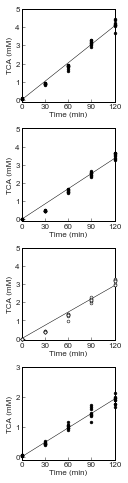

In [57]:
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# rows = 3
# cols = 1

# fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.5*rows), sharey = 'row', constrained_layout = True)
# # plt.tight_layout(h_pad = 0) #tidies up spacing between plots

# results = dict()

# for s in strains:
#     results[s] = dict()
#     for c in iptg_conc:

#         # set figure position within subplot
#         FP = ax_means2[strains.index(s)]
# #         FP.set_aspect('equal', adjustable = 'box') 

#         # make plot borders black and specified thickness
#         for spine in FP.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(1)

#         # calculate slope of best-fit line through the points
#         results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

#         if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))
            
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = 'black', zorder=0,
#                 linewidth = 0.5)
            
        
#         # plot data
#         if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

#             # plot best-fit line
#             y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#             FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                     linewidth = 0.5)

# #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
# #            marker = 'o', ms = 10, linewidth = 4,
# #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


#         FP.grid(False)
# #         FP.set_title(s, size = 30, pad = 10)
# #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
#         FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
#         FP.set_xlim(0,120)

# #         if strains.index(s) == 0:
#         FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
# #         FP.yaxis.set_major_locator(MultipleLocator(0.5))
# #         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# #         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#         FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
#         FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#         FP.legend(markerscale = 1, fontsize = 7, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon = False)
        
# #         set_size(2,2)
# # plt.show()


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 4
cols = 1

fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols*2/3,1.65*rows), sharey = 'row', constrained_layout = True)
# plt.tight_layout(h_pad = 0) #tidies up spacing between plots

results = dict()
# model= dict()
results_reps = dict()

for s in strains:
    results[s] = dict()
    results_reps[s] = dict()
#     model[s] = dict()
    c = strains_iptg_conc[s]
    results_reps[s][c] = dict()

    # set figure position within subplot
    FP = ax_means2[strains.index(s)]
#         FP.set_aspect('equal', adjustable = 'box') 

    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


    x_means = grouped_df[(grouped_df['strain_num']== s) &
            (grouped_df['inducer_conc']== c)
            ].loc[:,'time']


    y_means = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'mean']

    y_std = grouped_df[(grouped_df['strain_num']== s) &
        (grouped_df['inducer_conc']== c)
        ].loc[:,'std']

    # calculate slope of best-fit line through the points
    # if statements because Chris wanted to fix fits to (0,0) and wanted to exclude rightmost points for full induction

    results[s][c] = LinearRegression(fit_intercept=False)
#         model[s][c].fit(new_x[:, np.newaxis], new_y)

#         xfit = np.linspace(0, 10, 1000)
#         yfit = model.predict(xfit[:, np.newaxis])

    if s=='AJT462' and c==1000:
        new_x = x_means[:-1]
        new_y = pd.Series([0]).append(y_means[1:-1])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

    elif s=='AJT463' and c==0:
        new_x = x_means[:-1]
        new_y = pd.Series([0]).append(y_means[1:-1])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
        #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

    else:
        new_x = x_means
        new_y = pd.Series([0]).append(y_means[1:])
        results[s][c].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means, pd.Series([0]).append(y_means[1:]))

#         results[s][c] = linregress(x_means, y_means)

## COMMENTED OUT BELOW

    for r in replicate:

        x = data[(data['strain_num']== s) &
            (data['inducer_conc']== c) &
            (data['replicate']== r)
            ].loc[:,'time']


        y = data[(data['strain_num']== s) &
            (data['inducer_conc']== c) &
            (data['replicate']== r)
            ].loc[:,'tca_conc']


#         # plot data
#         FP.errorbar(x_means, y_means, yerr = y_std,
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
#                     mew = 4, marker = 'o', ms = 12, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
#                     label = '{} \u03BCM IPTG'.format(c))

#         # plot best-fit line
#         y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#         FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
#                 linewidth = 4)

        # made separate variable for calculating rates of each replicate so I can report a standard deviation
        results_reps[s][c][r] = LinearRegression(fit_intercept=False)
#         model[s][c].fit(new_x[:, np.newaxis], new_y)

#         xfit = np.linspace(0, 10, 1000)
#         yfit = model.predict(xfit[:, np.newaxis])

        if s=='AJT462' and c==1000:
            new_x = x[:-1]
            new_y = pd.Series([0]).append(y[1:-1])
#                 results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)
#             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

        elif s=='AJT463' and c==0:
            new_x = x[:-1]
            new_y = pd.Series([0]).append(y[1:-1])
#                 results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)
            #             results[s][c] = linregress(x_means[:-1], pd.Series([0]).append(y_means[1:-1]))

        else:
            new_x = x
            new_y = pd.Series([0]).append(y[1:])

        results_reps[s][c][r].fit(new_x[:, np.newaxis], new_y)

        y_fit_reps = results_reps[s][c][r].intercept_ + results_reps[s][c][r].coef_[0]*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value



        if c == 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

            FP.scatter(x, y, 
                    color = 'white', zorder = 11, edgecolors = 'black', linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c), clip_on=False)


            if r == 3:

                y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value

                FP.plot(time, y_fit, color = 'black', zorder=0,
                    linewidth = 0.5)


        # plot data
        if c != 0:
#             FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
#                     mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
#                     marker = 'o', ms = 2, linewidth = 0,
#                     ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
#                     label = '{} \u03BCM IPTG'.format(c))

            FP.scatter(x, y, 
                    color = 'black', zorder = 11, 
                    edgecolors = 'black', linewidths = 0.5,
                    marker = 'o', s = 8,
                    label = '{}'.format(c), clip_on=False)


            if r == 3:
                # plot best-fit line
                y_fit = results[s][c].intercept_ + results[s][c].coef_[0]*pd.Series(time)
#                     y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value

                FP.plot(time, y_fit, color = 'black', zorder=0,
                        linewidth = 0.5)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


    FP.grid(False)
#         FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
    FP.set_xlabel('Time (min)', size = 8, labelpad = 2)

#         if s == 'AJT437':
#             FP.set_ylim(-0.1,3)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))
#         if s == 'AJT462':
#             FP.set_ylim(-0.013,0.4)
#             FP.yaxis.set_major_locator(MultipleLocator(0.1))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         if s == 'AJT463':
#             FP.set_ylim(-0.033,1)
#             FP.yaxis.set_major_locator(MultipleLocator(0.5))
#             FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             FP.yaxis.set_minor_locator(MultipleLocator(0.1))

    FP.set_xlim(0,120)
    
    if s =='SYNB1618':
        FP.set_ylim(-0.1,3)
        
    else:
        FP.set_ylim(-0.1,5)

#         if strains.index(s) == 0:
    FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)

    FP.yaxis.set_major_locator(MultipleLocator(1))
#         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.set_xticks(time)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

#     FP.legend(markerscale = 1, fontsize = 8, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0., frameon = False)

#         set_size(2,2)
# plt.show()



In [58]:
# fig_means2.savefig('FigS13_SYN7664_SYN7696_SYN8784_SYNB1618_TCAconversion_Time_x_TCA_AllPoints.pdf', bbox_inches = "tight", transparent = True)




In [35]:
print("Model slope:    ", results['AJT463'][0].coef_[0])
print("Model intercept:", results['AJT463'][0].intercept_)

Model slope:     0.024786453551576538
Model intercept: 0.0


In [50]:
# TCA rate calculation (involves OD600)
# slope*60/((OD600 * OD_conv_slope + OD_conv_int)/1e9)


rates = dict()

for s in strains:
    rates[s] = dict()
#     model[s] = dict()
    c = strains_iptg_conc[s]
    slope = results[s][c].coef_[0]
#         od_val = grouped_od[(grouped_od['strain_num']==s)&(grouped_od['inducer_conc']==c)]['mean'].values[0]
#         print(od_val)

    rates[s][c] = slope*60#/od_val
        


In [51]:
rates_df = pd.DataFrame.from_dict(rates)

display(rates_df)

,SYN7664,SYN7696,SYN8784,SYNB1618
0,NaN,NaN,1.461002,NaN
1000,2.034973,1.675415,NaN,0.968256


In [60]:
# TCA rate calculation (involves OD600)
# slope*60/((OD600 * OD_conv_slope + OD_conv_int)/1e9)


rates_reps = dict()

for s in strains:
    rates_reps[s] = dict()
#     model[s] = dict()
    c = strains_iptg_conc[s]
    rates_reps[s][c] = dict()
    for r in replicate:

        slope = results_reps[s][c][r].coef_[0]
#             od_val = grouped_od[(grouped_od['strain_num']==s)&(grouped_od['inducer_conc']==c)]['mean'].values[0]
#             print(od_val)
#             print(s,c,r)
        rates_reps[s][c][r] = slope*60#/od_val
        


In [62]:
rates_reps_df = dict() 
for s in strains:
    rates_reps_df[s] = pd.DataFrame.from_dict(rates_reps[s])

    display(rates_reps_df[s])

# rates_reps_df = pd.DataFrame.from_dict(rates_reps)
# display(rates_reps_df)

,1000
1,2.086019
2,2.006685
3,2.012215


,1000
1,1.686020
2,1.731246
3,1.608980


,0
1,1.497697
2,1.398603
3,1.486707


,1000
1,0.932029
2,1.014410
3,0.958330


In [73]:
melted = dict()
temp = pd.DataFrame()

for s in strains:
    
    melted[s] = pd.melt(rates_reps_df[s])
    melted[s]['strain_num'] = [s]*len(melted[s]['value'])
    temp = pd.concat([temp, melted[s]])
    
# display(temp)

# # temp = pd.Series()

# # combined = pd.concat([melted['AJT462'], melted['AJT463']])

grouped = temp.groupby(['strain_num','variable'], as_index=False).agg([np.mean, np.std])

grouped = grouped['value'].reset_index()
grouped['mean'] = grouped['mean'].round(2)
grouped['std'] = grouped['std'].round(2)

display(grouped)

,strain_num,variable,mean,std
0,SYN7664,1000,2.03,0.04
1,SYN7696,1000,1.68,0.06
2,SYN8784,0,1.46,0.05
3,SYNB1618,1000,0.97,0.04


In [76]:
# with open('Fig4_new_rates.pkl', 'wb') as open_file:
#     pickle.dump(temp.reset_index(drop=True), open_file)
